<a href="https://colab.research.google.com/github/hunheay123/SeedVOV/blob/eunjae/Python_Deep_Learning_0822(Day2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오전 과제 풀이

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rootdir = '/content/drive/MyDrive/새싹/0809-0820 Python Machine Learning'

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [ ]:
train = pd.read_csv(os.path.join(rootdir, '', 'train.csv'))
test = pd.read_csv(os.path.join(rootdir, '', 'test.csv'))

In [ ]:
x_train = train.drop(['subject','Activity'],axis=1)
x_test = test.drop(['subject','Activity'],axis=1)
y_train = train.Activity
y_test = test.Activity

In [ ]:
y_train_enc = pd.get_dummies(y_train).values.astype('uint8')
y_test_enc = pd.get_dummies(y_test).values.astype('uint8')
# get_dummies : 범주형 변수를 one-hot incoding 형식으로 변환하는 데 사용됨

In [ ]:
import numpy as np
np.unique(y_train)

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
print(y_train_encoded)
y_train_oh = to_categorical(y_train_encoded)
print(y_train_oh)

[2 2 2 ... 5 5 5]
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_zs = scaler.transform(x_train)
x_test_zs = scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
model = Sequential()
model.add(Input(shape=(561,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(x_train_zs, y_train_enc,
                 validation_data=(x_test_zs, y_test_enc),
                 epochs=10)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 256)                 │         143,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177,542 (693.52 KB)

 Trainable params: 177,542 (693.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8434 - loss: 0.3761 - val_accuracy: 0.9311 - val_loss: 0.1805
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9708 - loss: 0.0768 - val_accuracy: 0.9165 - val_loss: 0.2308
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9724 - loss: 0.0654 - val_accuracy: 0.9237 - val_loss: 0.2433
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9795 - loss: 0.0505 - val_accuracy: 0.9460 - val_loss: 0.1908
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9871 - loss: 0.0349 - val_accuracy: 0.9237 - val_loss: 0.3897
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9865 - loss: 0.0379 - val_accuracy: 0.9162 - val_loss: 0.3855
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9781 - loss: 0.0604 - val_accuracy: 0.9430 - val_loss: 0.2050
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9917 - loss: 0.0239 - val_accuracy

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
model = Sequential()
model.add(Input(shape=(561,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train_enc,
                 validation_data=(x_test, y_test_enc),
                 epochs=100)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 256)                 │         143,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177,542 (693.52 KB)

 Trainable params: 177,542 (693.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7555 - loss: 0.5926 - val_accuracy: 0.9304 - val_loss: 0.1862
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9503 - loss: 0.1242 - val_accuracy: 0.9328 - val_loss: 0.1818
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9519 - loss: 0.1245 - val_accuracy: 0.9396 - val_loss: 0.1676
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9698 - loss: 0.0749 - val_accuracy: 0.9335 - val_loss: 0.1886
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9621 - loss: 0.0996 - val_accuracy: 0.9199 - val_loss: 0.2108
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9642 - loss: 0.0930 - val_accuracy: 0.9186 - val_loss: 0.2410
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9759 - loss: 0.0602 - val_accuracy: 0.9379 - val_loss: 0.1836
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9644 - loss: 0.0913 - val_a

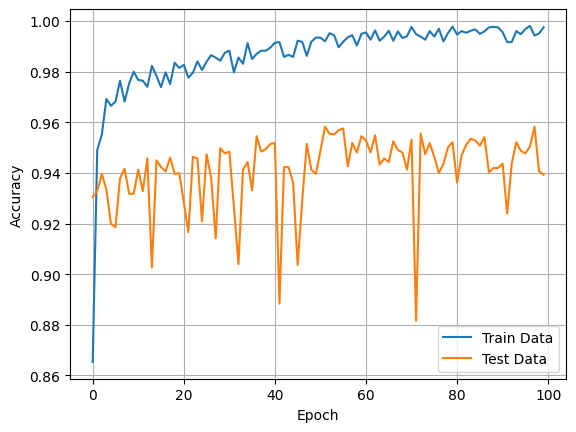

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(hist.history['accuracy'])),hist.history['accuracy'], label='Train Data')
plt.plot(range(len(hist.history['val_accuracy'])),hist.history['val_accuracy'], label='Test Data')
plt.legend();plt.grid()
plt.xlabel('Epoch');plt.ylabel('Accuracy')
plt.show()

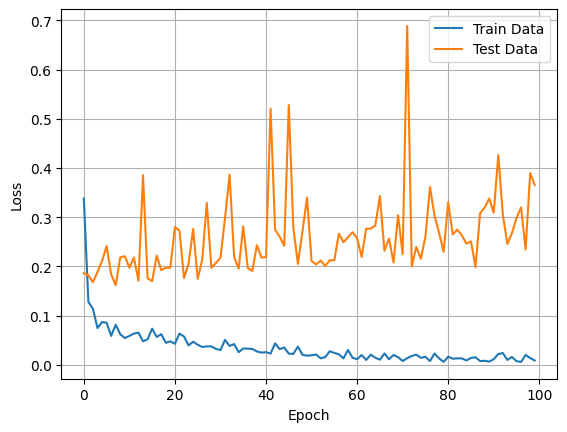

In [ ]:
# Loss Function
import matplotlib.pyplot as plt
plt.plot(range(len(hist.history['loss'])),hist.history['loss'], label='Train Data')
plt.plot(range(len(hist.history['val_loss'])),hist.history['val_loss'], label='Test Data')
plt.legend();plt.grid()
plt.xlabel('Epoch');plt.ylabel('Loss')
plt.show()

# loss값이 더 중요함

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(Input(shape=(561,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath=rootdir+'model.keras', # 모델 저장 경로
                                             monitor='val_loss', # 모델의 성능을 평가할 지표
                                             save_best_only=True, # 위에서 monitor로 선정한 지표가 개선될때만 저장
                                             verbose=1) # 로그 출력 여부

early_stopping = EarlyStopping(monitor='val_loss', # 조기 종료를 결정할 지표
                                               patience=10, # 지표가 마지막으로 개선된지 patinece만큼의 epoch이 지났는데도 개선이 일어나지 않는다면 종료하라는 의미
                                               restore_best_weights=True, # 조기 종료로 학습이 중지될시, 최선의 지표로 예전에 저장된 값을 저장할지, 아니면 현 시점에 일어난 학습의 가중치를 저장할지 정한다
                                               verbose=1) # 로그 출력 여부
hist = model.fit(x_train, y_train_enc,
                 validation_data=(x_test, y_test_enc),
                 callbacks=[early_stopping, checkpoint],
                 epochs=500)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 256)                 │         143,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177,542 (693.52 KB)

 Trainable params: 177,542 (693.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7688 - loss: 0.6212
Epoch 1: val_loss did not improve from 0.14859
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7692 - loss: 0.6201 - val_accuracy: 0.8972 - val_loss: 0.2466
Epoch 2/500
223/230 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9365 - loss: 0.1575
Epoch 2: val_loss did not improve from 0.14859
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9366 - loss: 0.1571 - val_accuracy: 0.8955 - val_loss: 0.2445
Epoch 3/500
224/230 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.1231
Epoch 3: val_loss did not improve from 0.14859
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9456 - loss: 0.1228 - val_accuracy: 0.9304 - val_loss: 0.1903
Epoch 4/500
226/230 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9675 - loss: 0.0788
Epoch 4: val_loss did not improve from 0.14859
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9675 - loss: 0.0789 - val_accuracy: 0.9226 - val_loss: 0

In [ ]:
from tensorflow.keras.models import load_model
ha_model = load_model(rootdir+'model.keras')
ha_model.summary()
# 모양은 동일하지만 pre-trained model(이미 학습된 모델)
print(x_test.values[0].shape)
pred = ha_model.predict(x_test.values[np.newaxis,0])
# ha_model.predict(x_test.values[:1])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 256)                 │         143,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 532,628 (2.03 MB)

 Trainable params: 177,542 (693.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 355,086 (1.35 MB)

(561,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


In [ ]:
print(pred)
np.sum(pred)
np.argmax(ha_model.predict(x_test), axis=1) # 예측값 중 가장 확률이 높은 클래스의 인덱스를 찾는다

[[3.7290676e-05 3.8567741e-04 9.9947244e-01 2.7170041e-05 4.4266970e-05
  3.3170778e-05]]
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([2, 2, 2, ..., 5, 5, 5])

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


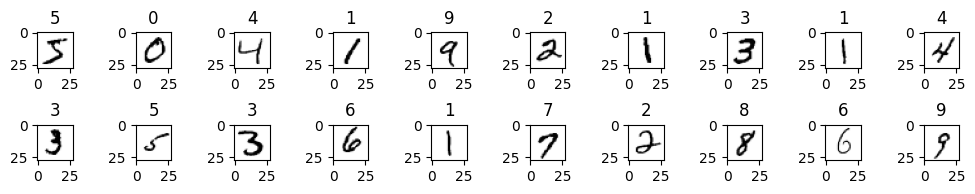

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 10, layout='tight', figsize=(10, 2))
for i in range(20):
  axs.flat[i].set_title(y_train[i])
  axs.flat[i].imshow(x_train[i], cmap='Greys')
plt.show()

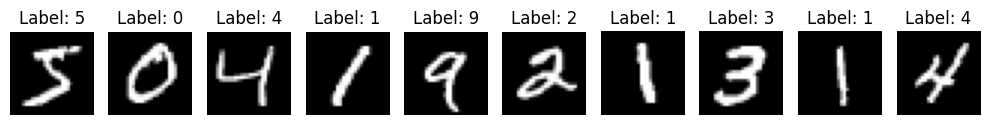

In [ ]:
# or
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
np.min(x_train[0]), np.max(x_train[0])

(0, 255)

In [ ]:
from tensorflow.keras.utils import to_categorical
x_train_1d = x_train.reshape(60000, -1) / 255
x_test_1d = x_test.reshape(10000, -1) / 255
y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)
print(x_train_1d.shape, y_train_enc.shape, x_test_1d.shape, y_test_enc.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [ ]:
rootdir = '/content/drive/MyDrive/새싹/'
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
esc = EarlyStopping(monitor='val_loss', patience=10)
chkpt = ModelCheckpoint(filepath=rootdir+'mnist_model.keras',
                        monitor='val_loss', verbose=1,
                        save_best_only=True)
hist = model.fit(x_train_1d, y_train_enc,
                 validation_data=(x_test_1d, y_test_enc),
                 callbacks=[esc, chkpt],
                 epochs=100)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8933 - loss: 0.3585
Epoch 1: val_loss improved from inf to 0.11278, saving model to /content/drive/MyDrive/새싹/mnist_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.8935 - loss: 0.3577 - val_accuracy: 0.9644 - val_loss: 0.1128
Epoch 2/100
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9733 - loss: 0.0844
Epoch 2: val_loss improved from 0.11278 to 0.07883, saving model to /content/drive/MyDrive/새싹/mnist_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9733 - loss: 0.0844 - val_accuracy: 0.9752 - val_loss: 0.0788
Epoch 3/100
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9821 - loss: 0.0548
Epoch 3: val_loss improved from 0.07883 to 0.07373, saving model to /content/drive/MyDrive/새싹/mnist_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9821 - loss: 0.0548 - val_accuracy: 0.9768 - val_loss: 0.0737
Epoch 4/100
1873/1875 ━━━━━━━━━━━━━━━━

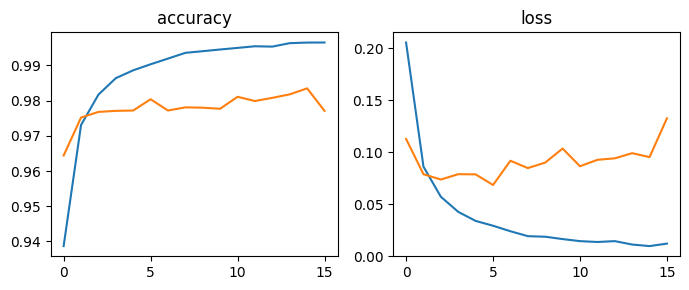

In [ ]:
def train_report(hist):
  fig, axs = plt.subplots(1, 2, layout='tight', figsize=(7, 3))
  for i, mt in enumerate(['accuracy', 'val_accuracy', 'loss', 'val_loss']):
    if i % 2 == 0:
      axs.flat[i//2].set_title(mt)
    axs.flat[i//2].plot(range(len(hist.history[mt])), hist.history[mt], label=mt)
  plt.show()
train_report(hist)

# =================================================================

In [ ]:
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
x_data = []
y_data = []
for imgname in glob.glob('/content/drive/MyDrive/새싹/0821-0823 Python Deep Learning/celeb/*'):
  print(imgname)
  img = Image.open(imgname).convert('L')
  img = img.resize((100,100))
  ndimg = 255-np.array(img)
  x_data.append(ndimg)
  if (imgname.split('/')[-1].startswith('man')):
    y_data.append(0)
  else:
    y_data.append(1)
  print(ndimg.shape)
  plt.imshow(ndimg, cmap='Greys')
  plt.show()
x_data = np.array(x_data)
y_data = np.array(y_data)
print(x_data.shape, y_data.shape)

(0,) (0,)
